# Prostate model

In [1]:
# Set up working environment for CoLoMoTo
import ginsim
import biolqm
import maboss
from colomoto_jupyter import tabulate
# for fixpoint table display
from itertools import combinations
# for iterating over sets
import matplotlib.pyplot as plt
# for modifying plots

All tools presented here are part of the CoLoMoTo initiative. They are interoperable and the output of one can be used as the input of another one. 

## GINsim

The model was drawn with the modelling tool GINsim. The model was then exported to Cytoscape for arranging the layout. 

In [2]:
ginsim_WT = ginsim.load("PC.zginml")

In [3]:
ginsim.show(ginsim_WT)

Biolqm tool was then used to compute the stable states of the model. 

In [4]:
## Use biolqm to visualize the stable states
model_biolqm = ginsim.to_biolqm(ginsim_WT) # convert to biolqm

## Compute fixpoints
fps = biolqm.fixpoints(model_biolqm)
print(len(fps), "fixpoints") # shows the number of fixpoints
#tabulate(fps) # table displaying all the fixpoints

2460 fixpoints


## MaBoSS

The model is translated into MaBoSS model files from biolqm

In [5]:
model_maboss = biolqm.to_maboss(model_biolqm) # convert to maboss
model_maboss.update_parameters(sample_count=5000,max_time=40, time_tick=0.5, thread_count=6)

The model is loaded with all initial conditions set to 0. It is possible to consider random initial conditions by explictly setting them to 0.5 as follows. For our purposes here, we start with random initial conditions as they allow to explore the whole state transition graph. The biological reasons for this choice may be discussed and questionable, but we assume that if we take a snapshot of the cell at a certain time, it is more reasonable to start with values that are random rather than everything off or inactive. 

In [6]:
# For all nodes of the network, set the initial state to random
for n in model_maboss.network:
    model_maboss.network.set_istate(n,[0.5,0.5])
    
WT_allinputs = model_maboss.copy()

In [7]:
#WT_allinputs.print_cfg()

In [8]:
# Select outputs for visualisation of the results
WT_allinputs.network.set_output(('Apoptosis','Metastasis', 'Proliferation', 'DNA_Repair'))
run_WT_allinputs = WT_allinputs.run()

If we plot all the stable states, we can see that they do not add to 1, meaning that there exist some complex attractors, such as limit cycles. 

/Users/laurence/opt/miniconda3/envs/colosys/lib/python3.7/site-packages/maboss/results/baseresult.py:117: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  plot_fix_point(self.get_fptable(), axes, self.palette)


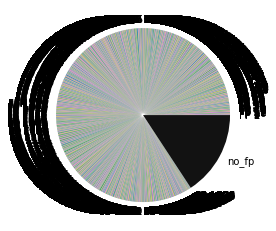

In [9]:
run_WT_allinputs.plot_fixpoint()

To further confirm the existence of limit cycles, we plot the entropy and the transition entropy which measure the internal chaos inside the system. The obtained signature confirms that there is indeed a limit cycle.

Text(0.5, 1.0, 'WT entropy')

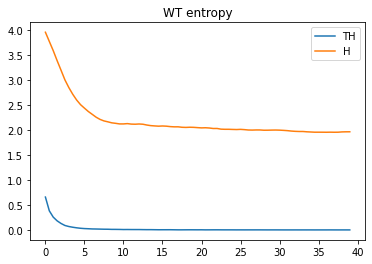

In [10]:
run_WT_allinputs.plot_entropy_trajectory()
plt.title('WT entropy')

#### Simulation with random initial conditions

Text(0.5, 1.0, 'Wild type conditions')

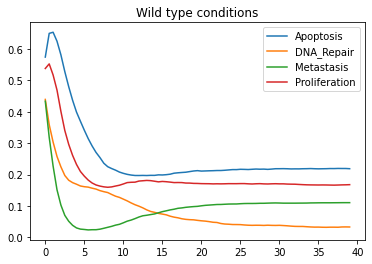

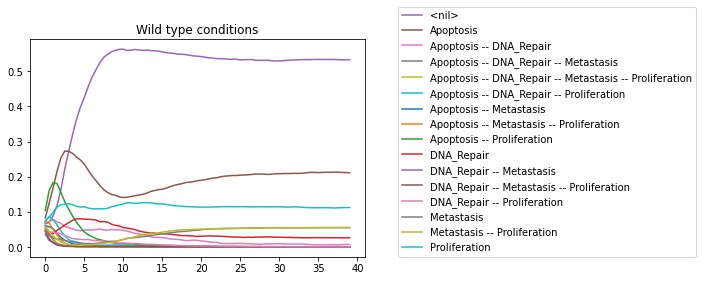

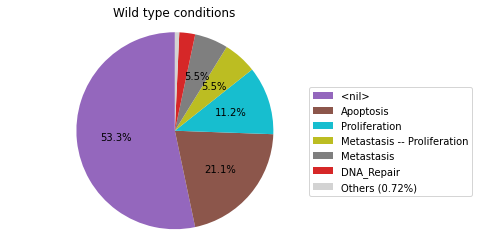

In [11]:
# Plot the results of the WT simulation
run_WT_allinputs.get_nodes_probtraj().plot(legend=True)
plt.title('Wild type conditions')

run_WT_allinputs.plot_trajectory(legend=True)
plt.title('Wild type conditions')

# Plot pie chart
run_WT_allinputs.plot_piechart()
plt.title('Wild type conditions')

# Note that the model state <nil> means that none of the external variables are ON. 
# figure = run_WT_allinputs.get_states_probtraj().plot()
# save_figure(figure, 'WT')

# Simulations of different inputs

We now wish to explore the effect of some input activation on the final probabilities

#### Simulations will all inputs at 0

Set all inputs at 0 to explore the effect of individual input

In [12]:
# Set conditions for simulations

# all nodes are random except for the initial conditions and outputs
WT_allinputs0 = maboss.copy_and_update_parameters(WT_allinputs, {'max_time':40})
for name in "EGF FGF TGFb Nutrients Hypoxia Acidosis Androgen fused_event TNFalpha SPOP Carcinogen Apoptosis Proliferation DNA_Repair Metastasis Invasion Migration".split(' '):
    WT_allinputs0.network.set_istate(name, [1,0]) 

# for all nodes of the network, the initial state is 0
# for n in WT.network:
#    WT_allinputs0.network.set_istate(n,[1,0])

In [13]:
# Run model
WT_allinputs0.network.set_output(('CyclinD','E2F1', 'CyclinB','RB1','Apoptosis','Metastasis', 'Proliferation', 'DNA_Repair'))
run_WT_allinputs0 = WT_allinputs0.run()

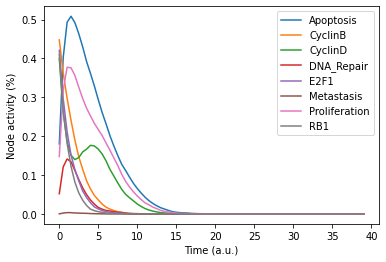

In [14]:
# Figure 2A
#run_WT_allinputs0.plot_piechart()
figure_WT = run_WT_allinputs0.get_nodes_probtraj().plot(legend=True)
plt.xlabel("Time (a.u.)")
plt.ylabel("Node activity (%)")
figure_WT
plt.savefig("WT.pdf")

#run_WT_allinputs0.get_states_probtraj().plot(legend=True)
#plt.xlabel("Time (a.u.)")
#plt.ylabel("Node activity (%)")

#### Simulations for Growth factors as inputs ON 

In [15]:
# Model with GF ON at initial step
#WT_GFinput = WT_allinputs0.copy()
WT_GFinput = maboss.copy_and_update_parameters(WT_allinputs0, {'max_time':30})

# set all the inputs to 0 and allow EGF only to be 1
# Modify the initial state by hand to test individual inputs
# WT_input.network.set_istate('Nutrients', [0,1])

In [16]:
# Figure 2B - Proliferation
# To test combinations of inputs, include all lines
WT_GFinput.network.set_istate('EGF', [0,1])
WT_GFinput.network.set_istate('FGF', [0,1])
WT_GFinput.network.set_istate('Nutrients', [0,1])
WT_GFinput.network.set_istate('Androgen', [0,1])
WT_GFinput.network.set_istate('SPOP', [0.5,0.5])
#WT_GFinput.network.set_istate('TGFb', [0,1])

In [17]:
# Visualize only the selected phenotypes
WT_GFinput.network.set_output(('CyclinD','E2F1','CyclinB','RB1','p53','Apoptosis','Metastasis', 'Proliferation', 'DNA_Repair'))
run_GFinput = WT_GFinput.run()

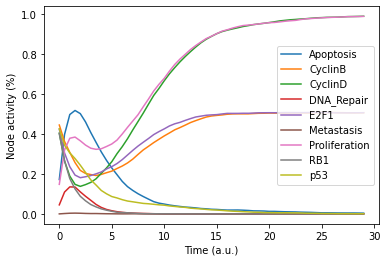

In [18]:
# Plot pie chart
#run_GFinput.plot_piechart()

# Plot the trajectories
figure_WT_GF = run_GFinput.get_nodes_probtraj().plot(legend=True)
plt.xlabel("Time (a.u.)")
plt.ylabel("Node activity (%)")
figure_WT_GF
plt.savefig("WT_GF.pdf")

#run_GFinput.get_states_probtraj().plot(legend=False)

#### Simulation with death signals ON

In [19]:
# Figure 2C - Apoptosis
WT_Deathinput = WT_allinputs0.copy()

In [20]:
WT_Deathinput.network.set_istate('Carcinogen', [0,1])
WT_Deathinput.network.set_istate('Androgen', [0,1])
#WT_GFinput.network.set_istate('SPOP', [1,0])
WT_Deathinput.network.set_istate('TNFalpha', [0,1])
WT_Deathinput.network.set_istate('Hypoxia', [0,1])
WT_Deathinput.network.set_istate('Acidosis', [0,1])

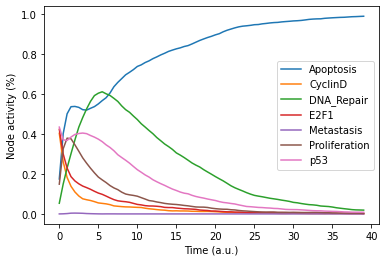

In [21]:
# Visualize only the selected phenotypes
WT_Deathinput.network.set_output(('CyclinD','E2F1','p53','Apoptosis','Metastasis', 'Proliferation', 'DNA_Repair'))
run_Deathinput = WT_Deathinput.run()

# Plot the trajectories
figure_Death = run_Deathinput.get_nodes_probtraj().plot(legend=True)
plt.xlabel("Time (a.u.)")
plt.ylabel("Node activity (%)")
figure_Death
plt.savefig("WT_Death.pdf")

#run_GFinput.get_states_probtraj().plot(legend=False)

#### Simulation with different initial conditions

With the next cell, anyinitial conditions can be tested to verify the behaviour of the model in physiological conditions

In [22]:
# To test combinations of inputs, include all lines or modify the inputs as desired
WT_GFinput = maboss.copy_and_update_parameters(WT_allinputs0, {'max_time':50})
WT_GFinput.network.set_istate('EGF', [1,0])
WT_GFinput.network.set_istate('FGF', [1,0])
WT_GFinput.network.set_istate('Nutrients', [1,0])
WT_GFinput.network.set_istate('SPOP', [0.5,0.5])
WT_GFinput.network.set_istate('Hypoxia', [1,0])
WT_GFinput.network.set_istate('Carcinogen', [1,0])
WT_GFinput.network.set_istate('TNFalpha', [1,0])
WT_GFinput.network.set_istate('TGFb', [1,0])
WT_GFinput.network.set_istate('Acidosis', [0,1])

By modifying the conditions above, the importance of each input can be tested individually or in combination.

In [23]:
# Visualize only the selected phenotypes
WT_GFinput.network.set_output(('Apoptosis','Proliferation', 'ERK', 'p53'))
run_GFinput = WT_GFinput.run()

/Users/laurence/opt/miniconda3/envs/colosys/lib/python3.7/site-packages/maboss/figures.py:87: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  startangle=90, colors=color_list, **opts)


<AxesSubplot:>

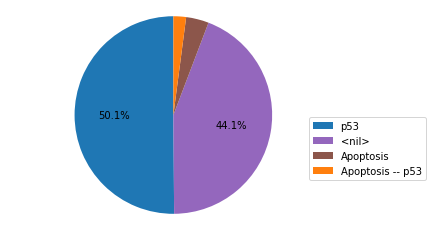

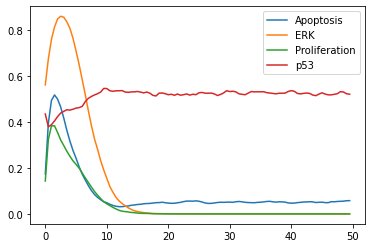

In [24]:
# Plot pie chart
run_GFinput.plot_piechart()

# Plot the trajectories
run_GFinput.get_nodes_probtraj().plot(legend=True)
#run_GFinput.get_states_probtraj().plot(legend=True)


#### Sequential activation of the cyclins.

In [25]:
# Visualize only the cyclins
# Model with GF ON at initial step
WT_GFinput_cyclins = maboss.copy_and_update_parameters(WT_allinputs0, {'max_time':30})


# To test combinations of inputs, include all lines
WT_GFinput_cyclins.network.set_istate('EGF', [0,1])
WT_GFinput_cyclins.network.set_istate('FGF', [0,1])
WT_GFinput_cyclins.network.set_istate('Nutrients', [0,1])
WT_GFinput_cyclins.network.set_istate('Hypoxia', [0,1])

WT_GFinput.network.set_istate('SPOP', [0.5,0.5])

# Start with a quiescent-like state
#WT_GFinput_cyclins.network.set_istate('RB1', [0,1])
#WT_GFinput_cyclins.network.set_istate('p21', [0,1])
WT_GFinput_cyclins.network.set_istate('E2F1', [1,0])
WT_GFinput_cyclins.network.set_istate('CyclinD', [1,0])
WT_GFinput_cyclins.network.set_istate('CyclinB', [1,0])


WT_GFinput_cyclins.network.set_output(('Proliferation','CyclinD','CyclinB', 'E2F1','RB1','p21'))
run_GFinput_cyclins = WT_GFinput_cyclins.run()

Text(0, 0.5, 'Cell Cycle activation (node probabilities)')

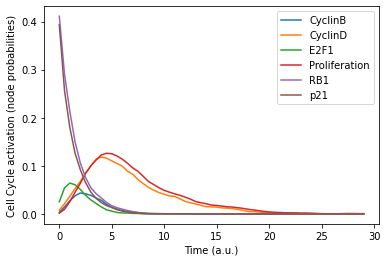

In [26]:
# Figure S5

# Plot the trajectories
run_GFinput_cyclins.get_nodes_probtraj().plot(legend=True)
plt.xlabel("Time (a.u.)")
plt.ylabel("Cell Cycle activation (node probabilities)")
#plt.savefig("cell_cycle.pdf")


#run_GFinput_cyclins.get_states_probtraj().plot(legend=True)

## Mutant simulations -- Examples

Next, we test some mutations of the nodes of the model to test that their deletion would have the expected effect. 

#### Simulate single mutations (Figures S6)

Text(0, 0.5, 'FOXA1 OFF - Phenotypes')

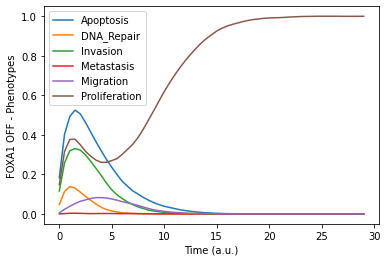

In [27]:
mut_FOXA1_OFF = maboss.copy_and_update_parameters(WT_allinputs0, {'max_time':30})
mut_FOXA1_OFF.network.set_output(('Apoptosis','Metastasis', 'Proliferation', 'DNA_Repair', 'Invasion', 'Migration'))


mut_FOXA1_OFF.network.set_istate('EGF', [0,1])
mut_FOXA1_OFF.network.set_istate('FGF', [0,1])
mut_FOXA1_OFF.network.set_istate('Nutrients', [0,1])
mut_FOXA1_OFF.network.set_istate('SPOP', [0.5,0.5])

mut_FOXA1_OFF.mutate("FOXA1", "OFF")
mutres_FOXA1_OFF = mut_FOXA1_OFF.run()
mutres_FOXA1_OFF.get_nodes_probtraj().plot(legend=True)
plt.xlabel("Time (a.u.)")
plt.ylabel("FOXA1 OFF - Phenotypes")

Text(0, 0.5, 'TP53 OFF - Phenotypes')

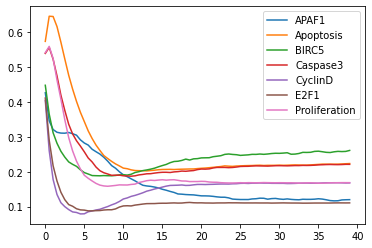

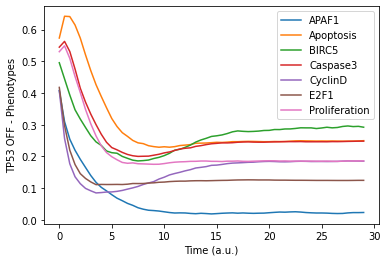

In [28]:
WT_allinputs.network.set_output(('CyclinD','E2F1','BIRC5', 'Caspase3','Apoptosis','Proliferation', 'APAF1'))
run_WT_allinputs = WT_allinputs.run()
run_WT_allinputs.get_nodes_probtraj().plot(legend=True)


mut_TP53_OFF = maboss.copy_and_update_parameters(WT_allinputs, {'max_time':30})
#mut_TP53_OFF.network.set_output(('Apoptosis','Metastasis', 'Proliferation', 'DNA_Repair', 'Invasion', 'Migration', 'Caspase3'))
#mut_TP53_OFF.network.set_output(('CyclinD','E2F1','BIRC5', 'Caspase3','Apoptosis','Metastasis', 'Proliferation', 'APAF1'))


#mut_TP53_OFF.network.set_istate('EGF', [0,1])
#mut_TP53_OFF.network.set_istate('FGF', [0,1])
#mut_TP53_OFF.network.set_istate('Nutrients', [0,1])
#mut_TP53_OFF.network.set_istate('Carcinogen', [0,1])
#mut_TP53_OFF.network.set_istate('SPOP', [0.5,0.5])

mut_TP53_OFF.mutate("p53", "OFF")
mutres_TP53_OFF = mut_TP53_OFF.run()
mutres_TP53_OFF.get_nodes_probtraj().plot(legend=True)
plt.xlabel("Time (a.u.)")
plt.ylabel("TP53 OFF - Phenotypes")

#### Simulate double mutations (Figure S7)

Text(0, 0.5, 'AR_ERG ON / NXK3-1 - Phenotypes')

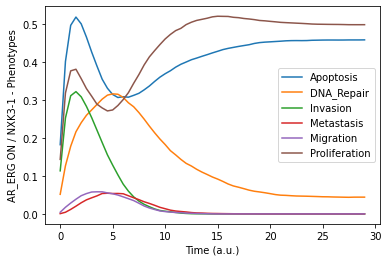

In [29]:
mut_AR_ERG_ON = maboss.copy_and_update_parameters(WT_allinputs0, {'max_time':30})
mut_AR_ERG_ON.network.set_output(('Apoptosis','Metastasis', 'Proliferation', 'DNA_Repair', 'Invasion', 'Migration'))


mut_AR_ERG_ON.network.set_istate('EGF', [0,1])
mut_AR_ERG_ON.network.set_istate('FGF', [0,1])
mut_AR_ERG_ON.network.set_istate('Nutrients', [0,1])
mut_AR_ERG_ON.network.set_istate('Carcinogen', [0,1])
mut_AR_ERG_ON.network.set_istate('SPOP', [0.5,0.5])

mut_AR_ERG_ON.mutate("AR_ERG", "ON")
mutres_AR_ERG_ON = mut_AR_ERG_ON.run()
#mutres_AR_ERG_ON.get_nodes_probtraj().plot(legend=True)
#plt.xlabel("Time (a.u.)")
#plt.ylabel("AR_ERG ON - Phenotypes")


mut_double = mut_AR_ERG_ON.copy()
mut_double.mutate("NKX3_1", "OFF")
mutres_double = mut_double.run()
mutres_double.get_nodes_probtraj().plot(legend=True)
plt.xlabel("Time (a.u.)")
plt.ylabel("AR_ERG ON / NXK3-1 - Phenotypes")